Primeiro passo importando as bibliotecas

In [1]:
import pandas as pd
import csv #importando csv
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import time

- A pesquisa ficou adestrita a região do vale do Jauru

- Região vale do Jauru

        Araputanga
        Figueirópolis d'Oeste
        Glória d'Oeste
        Indiavaí
        Jauru
        Lambari d'Oeste
        Mirassol d'Oeste
        Porto Esperidião
        Reserva do Cabaçal
        Rio Branco
        Salto do Céu
        São José dos Quatro Marcos


In [9]:
#PEP
cidade_link = open('src/arquivos.csv')

implementa = csv.DictReader(cidade_link)
#a leitura só funcionara com os parametros abaixo com o parametro acimas

for inplemente in implementa:
    #lendo arquivo python para rastrear o separador
    carregar_separador = open(inplemente['link'],encoding='ISO-8859-1')
    separa = csv.Sniffer().sniff(carregar_separador.read())
    separador = separa.delimiter
    print("Tipo de separador definido foi --> ", separador)
    #---------------------------------------
    #dividindo municipio para colocar na variavel de nome    
    dividi_municipio = inplemente['municipio'].split(' ')# o codigo dividi o nome do municipio
    #----------------------------------------------
    
    # Carregando csv no pandas 
    servidores = pd.read_csv(inplemente['link']#chama o arquivo csv 
                             ,sep=separador #informa o separador do arquivo
                             ,encoding='ISO-8859-1', #informa a codificação do arquivo
                             error_bad_lines=False,
                             engine='python') #trata os erros nas linhas
    nome_variavel = 'servidores_{}'.format(dividi_municipio[0])     #alterando o nome da variavel
    globals()[nome_variavel] = servidores
    globals()[nome_variavel]['Municipio'] = inplemente['municipio']
    print(nome_variavel)
    print('-------------------------')



Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
----------------------

- foi necessario criar uma variavel com todos os servidores dos municipios da região oeste

In [10]:
servidores_municipio_região_oeste = servidores_Lambari, servidores_Indiavaí, servidores_Jauru, servidores_Mirassol, servidores_Porto, servidores_Reserva, servidores_São, servidores_Figueirópolis,servidores_Salto, servidores_Rio, servidores_Gloria, servidores_Araputanga

In [11]:
resultado = pd.concat(servidores_municipio_região_oeste)
#salvando os dados dos servidores da região oeste em CSV
resultado.to_csv('servidores_selecionado.csv')

In [12]:
#exibindo os dados referente a região oeste 
resultado.head()

,Detalhe,Referência,Matrícula,Data Desligamento,Tipo de Contrato,Vínculo,Nome,Cargo,Cargo inicial,Proventos,Descontos,Líquido,Divisão,Subdivisão,Unidade,Categoria Funcional,Data Prevista Termino Contrato,Municipio,Data Admissão
0,NaN,Folha Mensal - Maio,195.0,NaN,Efetivo,Servidor Público Efetivo,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,"2.385,40","279,31","2.106,09",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
1,NaN,Folha Mensal - Maio,1810.0,NaN,Efetivo,Servidor Público Efetivo,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,"3.215,66","708,42","2.507,24",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
2,NaN,Folha Mensal - Maio,2.0,NaN,Efetivo,Servidor Público Efetivo,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,"2.956,45","409,31","2.547,14",SEC. MUN. DE INFRA ESTRUTURA,DPTO DE VIACAO E OBRAS,MANUT.ENC. SEC MUN. DE INFRA ESTRUTURA-EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
3,NaN,Folha Mensal - Maio,267.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,"1.600,00","134,97","1.465,03",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAN.PROG. AGENTES COMUNIT DE SAUDE-PACS - CONT...,CONTRATADO,NaN,Lambari D'Oeste,NaN
4,NaN,Folha Mensal - Maio,2318.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,"772,58","57,94","714,64",SEC. MUN. DE EDUCACAO E CULTURA,FUNDEB,MANUT. FUNDEB 60% CONTRATADO,CONTRATADO,NaN,Lambari D'Oeste,NaN


In [13]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
resultado.head()

,Nome,Cargo,Cargo inicial,Municipio
0,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,Lambari D'Oeste
1,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,Lambari D'Oeste
2,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,Lambari D'Oeste
3,ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,Lambari D'Oeste
4,ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,Lambari D'Oeste


# Objetivo
- Baixar dados do auxilio de forma descentralizada

#### FONTE DE DADOS
- SITE BRASIL IO 
* https://brasil.io/dataset/govbr/auxilio_emergencial/

#### METODO
- baixar os dados por municipios e salvar
- **DIFICULDADES**
    - O ARQUIVO VINHA COM MASCARA ENTÃO ORDENOU POR NUMERO PARA IMPLEMENTAR UMA BUSCA COM O FOR 

Implementando codigo para unir dados baixados do site brasil io

In [14]:
for i in range(1,12):
    print('df'+str(i))
    df = pd.read_csv("src/dados_brasil_io/govbr-{}.csv".format(i))
    nome_variavel = 'df{}'.format(i)
    globals()[nome_variavel] = df

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11


**Unindo os dataframes**

In [15]:
auxilio_emergencial = df1, df2, df3, df4, df5, df6, df7, df8, df9, df10 ,df11
auxilio_emergencial_vale_jauru = pd.concat(auxilio_emergencial)

In [16]:
auxilio_emergencial_vale_jauru

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,beneficiario,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,202004,MT,Rio Branco,NaN,***923871**,ZENAIDE VITTORAZZI RIOS,-2,NaN,NaN,EXTRA CADUN,1,1200.0
1296,202004,MT,Rio Branco,2.041920e+10,***364651**,ZENILDA MARQUES DE OLIVEIRA,20419196956,***364651**,ZENILDA MARQUES DE OLIVEIRA,BOLSA FAMILIA,1,600.0
1297,202004,MT,Rio Branco,2.041919e+10,***969521**,ZILDA ANDRADE DE ASSIS,20419186373,***969521**,ZILDA ANDRADE DE ASSIS,BOLSA FAMILIA,1,1200.0
1298,202004,MT,Rio Branco,2.092871e+10,***295061**,ZILDA SANTOS DE OLIVEIRA,-2,NaN,NaN,CADUN NAO BOLSA,1,600.0


In [17]:
auxilio_emergencial_vale_jauru = auxilio_emergencial_vale_jauru.rename(columns={'beneficiario':'Nome'})
auxilio_emergencial_vale_jauru.head()

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,Nome,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0


In [18]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
auxilio_emergencial_vale_jauru_trat =auxilio_emergencial_vale_jauru[['municipio', 'cpf_beneficiario', 'enquadramento', 'Nome']]

In [19]:
ser_rec_aux = auxilio_emergencial_vale_jauru_trat.merge(resultado, on='Nome')

In [20]:
ser_rec_aux.head(60)

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
2,Indiavaí,***692341**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
3,São José dos Quatro Marcos,***553991**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
4,São José dos Quatro Marcos,***791901**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
5,São José dos Quatro Marcos,***867011**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
6,Mirassol d'Oeste,***804311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
7,Jauru,***107941**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
8,Jauru,***964311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
9,Lambari D'Oeste,***039574**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu


In [21]:
ser_rec_aux.to_csv('servidores_auxilio.csv')

# Observações
- Conforme observa-se na busca há servidores que tem mesmo nome (homonimos) em diversas Unidade Gestoras dessa forma faz-se necessario fazer uma comparação no mesmo municipio.
- tem como objetivo isolar servidores pelo municipio que mesmo recebeu o auxilio e assim poder realmente comparar.
- Há formula abaixo não evita homonimos mas minimiza 

In [22]:
# Abreviatura
# ser_rec_aux_mun  = Servidores que receberan Auxilio Emergencial por municipio
ser_rec_aux_mun = ser_rec_aux[ser_rec_aux['municipio'] == ser_rec_aux['Municipio']]
ser_rec_aux_mun.head()


,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [23]:
ser_rec_aux_mun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 254
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         139 non-null    object
 1   cpf_beneficiario  139 non-null    object
 2   enquadramento     139 non-null    object
 3   Nome              139 non-null    object
 4   Cargo             139 non-null    object
 5   Cargo inicial     139 non-null    object
 6   Municipio         139 non-null    object
dtypes: object(7)
memory usage: 8.7+ KB


In [24]:
ser_rec_aux_mun.head()

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [25]:
dados_municipio = ser_rec_aux_mun['Municipio'].str.get_dummies().sum().sort_values(ascending=False)
dados_municipio

Porto Esperidião              39
Araputanga                    29
Mirassol d'Oeste              15
Figueirópolis D'Oeste         15
Lambari D'Oeste               13
Jauru                         13
São José dos Quatro Marcos     8
Salto do Céu                   4
Indiavaí                       3
dtype: int64

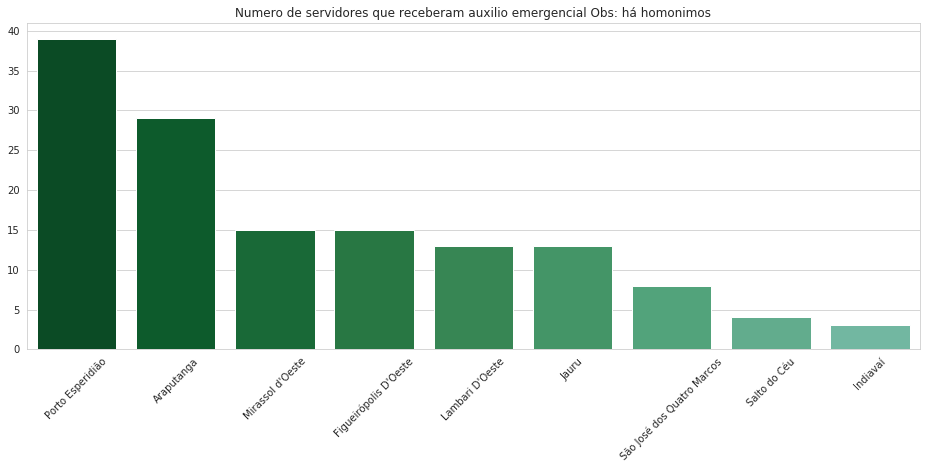

In [26]:
sns.set_style('whitegrid')# Adciona o grid ao fundo
plt.figure(figsize=(16, 6))#Coloca o tamanho da figura ;
plt.xticks(rotation=45)#rotacionado ticks a 45 grau desafio 01 aula 02

sns.barplot(x=dados_municipio.index,
            y=dados_municipio.values,
           palette=sns.color_palette('BuGn_r', n_colors=len(dados_municipio)+8))#cor da palete

plt.title("Numero de servidores que receberam auxilio emergencial Obs: há homonimos")
plt.axis()
plt.savefig("analise com homonimos.svg", format='svg', dpi=1200)
plt.show()

# _________________________________________
## Objetivo pegar os dados dos municipios com base nos nomes registrados no TCE-MT e do IPEA 
- NÃO FOI ENCONTRADO NENHUMA BASE DE DADOS ONDE E POSSIVEL CORRELACIONAR O CODIGO DO IBGE COM OS DADOS DOS CODIGOS DO TCE.
- TODAVIA É POSSIVEL ISOLAR A AREA PELO NOME DO TCE E CRIAR UMA TABELA DE CORRELAÇÃO PELO NOME
    - Metodo - implementar correlação somente para região oeste, assimm buscou dados de correlação de região sendo possivel achalas no site do IPEA no site:https://www.ipea.gov.br/ipeageo/bases.html
        - baixei os dados referente ao estado de Mato Grosso - MT em formato excel
    - Para pegar os nomes cadastrado no site do Tribunal de Contas do Estado de Mato Grosso, a busca deu-se no link https://servicos.tce.mt.gov.br/tabela-interna
        - Baixei as tabelas:
            - ***MUNICIPIO_MT*** - Cadastro dos municipios de Mato Grosso
            - ***TIPO_ENTIDADE*** - cadastro de tipo de unidade Gestora
            - ***UG*** - Unidades Gestoras Cadastradas
            

In [27]:
# Carregando e exibindo dados dos Municipios de Mato Grosso (MT)
df_municiopios_mt = pd.read_csv('src/dados_tce_mt/APLIC/MUNICIPIO_MT.csv', sep=';')
df_municiopios_mt.head()

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
0,510010,ACORIZAL,MT,344,5399.0,"846,36",2.0,5100102.0,ACORIZANO,6.3,39790.0,ACORIZAL,NaN,90018,130100,7.0
1,510020,AGUA BOA,MT,345,25721.0,"7510,61",4.0,5100201.0,AGUA-BOENSE,3.1,553164.0,ÁGUA BOA,NaN,91910,130103,2.0
2,510025,ALTA FLORESTA,MT,346,51782.0,"8976,31",4.0,5100250.0,ALTA-FLORESTENSE,5.6,783132.0,ALTA FLORESTA,NaN,89877,130106,10.0
3,510030,ALTO ARAGUAIA,MT,347,19044.0,"5514,51",3.0,5100300.0,ARAGUAIANO,3.2,697331.0,ALTO ARAGUAIA,NaN,90050,130101,3.0
4,510035,ALTO BOA VISTA,MT,348,6822.0,"2240,45",2.0,5100359.0,ALTO BOA VISTENSE,2.7,56101.0,ALTO BOA VISTA,NaN,1279,130103,1.0


In [28]:
# Carregando dados de Mato grosso 
# -----------Comentarios necessarios---------------
# - Tabelas Excel normamente vem com abas nomeada assim foi necessario verificar a que melhor atendia aos
#   quesistos a ser levantado esse nome é lançado no campo sheet_name
#---------------------------------------------------
df_dados_ipea = pd.read_excel('src/dados_ipea/MT_Mun97_region.xls', sheet_name='PIB  municipal (2010)')
df_dados_ipea 

,Código IBGE do Município,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome das Grandes Regiões,Código IBGE da Mesoregião,Nome da Mesoregião,Código IBGE da Microregião,Nome da Microregião,Impostos sobre produtos líquidos de subsídios a preços correntes,PIB a preços correntes,PIB per capita a preços correntes,Valor adicionado bruto da agropecuária a preços correntes,Valor adicionado bruto da indústria a preços correntes,Valor adicionado bruto dos serviços a preços correntes
0,510010,51,MT,Centro-Oeste,5104,Centro-Sul Mato-grossense,51016,Rosßrio Oeste,2777,51865,9402.66,22385,3736,22967
1,510020,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51010,Canarana,51299,418944,20099.00,88960,50791,227894
2,510025,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51002,Alta Floresta,62146,690143,14017.89,165223,100192,362582
3,510030,51,MT,Centro-Oeste,5105,Sudeste Mato-grossense,51022,Alto Araguaia,126461,1163457,74247.43,104460,485334,447202
4,510035,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51009,Norte Araguaia,2951,57908,11032.19,24353,4721,25884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,510860,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51009,Norte Araguaia,19291,291373,13613.65,104434,35915,131734
137,510880,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51003,ColÝder,3070,55659,11292.11,24606,3575,24408
138,510885,51,MT,Centro-Oeste,5104,Centro-Sul Mato-grossense,51015,Alto Paraguai,5142,61051,20872.11,19120,17245,19545
139,510890,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51005,Arinos,12431,186278,28266.83,103962,14644,55240


In [29]:
#tratando e selecionando somente os dadnos necessarios da tabela do IPEA
df_dados_ipea = df_dados_ipea[['Código IBGE do Município', 'Código IBGE da Microregião','Nome da Microregião']]
df_dados_ipea

,Código IBGE do Município,Código IBGE da Microregião,Nome da Microregião
0,510010,51016,Rosßrio Oeste
1,510020,51010,Canarana
2,510025,51002,Alta Floresta
3,510030,51022,Alto Araguaia
4,510035,51009,Norte Araguaia
...,...,...,...
136,510860,51009,Norte Araguaia
137,510880,51003,ColÝder
138,510885,51015,Alto Paraguai
139,510890,51005,Arinos


In [30]:
#selecionando dados do vale do Jauru
df_dados_ipea = df_dados_ipea[df_dados_ipea['Nome da Microregião']== 'Jauru']
df_dados_ipea

,Código IBGE do Município,Código IBGE da Microregião,Nome da Microregião
11,510125,51014,Jauru
43,510380,51014,Jauru
46,510395,51014,Jauru
49,510450,51014,Jauru
56,510500,51014,Jauru
61,510523,51014,Jauru
67,510562,51014,Jauru
96,510682,51014,Jauru
101,510710,51014,Jauru
102,510715,51014,Jauru


In [31]:
df_dados_ipea = df_dados_ipea.rename(columns={'Código IBGE do Município':'MUN_CODIGO'})
df_dados_ipea

,MUN_CODIGO,Código IBGE da Microregião,Nome da Microregião
11,510125,51014,Jauru
43,510380,51014,Jauru
46,510395,51014,Jauru
49,510450,51014,Jauru
56,510500,51014,Jauru
61,510523,51014,Jauru
67,510562,51014,Jauru
96,510682,51014,Jauru
101,510710,51014,Jauru
102,510715,51014,Jauru


In [32]:
df_municiopios_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MUN_CODIGO               143 non-null    int64  
 1   MUN_NOME                 143 non-null    object 
 2   UF_SIGLA                 143 non-null    object 
 3   ID_IBGE                  143 non-null    int64  
 4   POPULACAO                141 non-null    float64
 5   TERRITORIO               141 non-null    object 
 6   GRUPO_POPULACAO          141 non-null    float64
 7   CODIGO_DO_IBGE           141 non-null    float64
 8   GENTILICO                141 non-null    object 
 9   DENSIDADE_DEMOGRAFICA    141 non-null    float64
 10  SERIE_REVISADA           141 non-null    float64
 11  MUN_NOME_ORIGINAL        141 non-null    object 
 12  COMPATIBILIDADE_RF       2 non-null      object 
 13  CODIGO_DA_RF_01          143 non-null    int64  
 14  CODIGO_DA_RF_02          1

In [33]:
df_dados_ipea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 11 to 116
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   MUN_CODIGO                  12 non-null     int64 
 1   Código IBGE da Microregião  12 non-null     int64 
 2   Nome da Microregião         12 non-null     object
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


In [34]:
#df_municiopios_mt['MUN_CODIGO'] = df_municiopios_mt['MUN_CODIGO'].fillna(0.0).astype(int)
#df_municiopios_mt.info()

In [35]:
df_municiopios_mt.head()

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
0,510010,ACORIZAL,MT,344,5399.0,"846,36",2.0,5100102.0,ACORIZANO,6.3,39790.0,ACORIZAL,NaN,90018,130100,7.0
1,510020,AGUA BOA,MT,345,25721.0,"7510,61",4.0,5100201.0,AGUA-BOENSE,3.1,553164.0,ÁGUA BOA,NaN,91910,130103,2.0
2,510025,ALTA FLORESTA,MT,346,51782.0,"8976,31",4.0,5100250.0,ALTA-FLORESTENSE,5.6,783132.0,ALTA FLORESTA,NaN,89877,130106,10.0
3,510030,ALTO ARAGUAIA,MT,347,19044.0,"5514,51",3.0,5100300.0,ARAGUAIANO,3.2,697331.0,ALTO ARAGUAIA,NaN,90050,130101,3.0
4,510035,ALTO BOA VISTA,MT,348,6822.0,"2240,45",2.0,5100359.0,ALTO BOA VISTENSE,2.7,56101.0,ALTO BOA VISTA,NaN,1279,130103,1.0


In [36]:
df_municiopios_mt[df_municiopios_mt['MUN_NOME'] == 'JAURU']

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
54,510500,JAURU,MT,400,8793.0,"1301,89",3.0,5105002.0,JAURUENSE,7.1,132866.0,JAURU,NaN,89915,130109,4.0


In [37]:
df_municipios_com_id = df_municiopios_mt.merge(df_dados_ipea, on='MUN_CODIGO')

In [38]:
df_municipios_com_id = df_municipios_com_id[['MUN_CODIGO', 'Nome da Microregião','MUN_NOME', 'GENTILICO']]
df_municipios_com_id.head()

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE
1,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE
2,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE
3,510450,Jauru,INDIAVAI,INDIAVAIENSE
4,510500,Jauru,JAURU,JAURUENSE


In [32]:
df_ug_tce = pd.read_csv('src/dados_tce_mt/APLIC/UG.csv', sep=';')
df_ug_tce.head(60)

,NOME_ENTIDADE,CNPJ_CPF_COD_TCE_ENTIDADE,CNPJ_DIREITO_PUBLICO,ATIVO,ESFERA,PREVIDENCIA
0,1123959,CAMARA MUNICIPAL DE BOM JESUS DO ARAGUAIA,S,N,4.235199e+12,M
1,1116391,FUNDO DE APERFEICOAMENTO DOS SERVICOS JURIDICO...,S,N,3.340940e+11,E
2,1116615,PREFEITURA MUNICIPAL DE ALTO TAQUARI,S,N,1.362680e+12,M
3,1116623,CAMARA MUNICIPAL DE MIRASSOL DOESTE,S,N,3.756178e+12,M
4,1116698,CAMARA MUNICIPAL DE ALTO ARAGUAIA,S,N,1.362664e+12,M
5,1116946,FUNDO DE DESENVOLVIMENTO INDUSTRIAL E COMERCIAL,S,N,1.323697e+13,E
6,1117324,PREFEITURA MUNICIPAL DE NOVA SANTA HELENA,S,N,4.214704e+12,M
7,1117332,CAMARA MUNICIPAL DE SAO FELIX DO ARAGUAIA,S,N,1.505145e+13,M
8,1117340,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DE SANTO...,S,S,1.260655e+13,M
9,1117373,CAMARA MUNICIPAL DE NOVA SANTA HELENA,S,N,4.214699e+12,M


In [33]:
dados_jose = pd.read_excel('src/dados_tce_mt/Leandro DSA.xlsx')
dados_jose

,ENT_CODIGO,ENT_NOME,MUN_CODIGO
0,1115237,PREFEITURA MUNICIPAL DE NOVO SANTO ANTONIO,510631
1,1111129,PREFEITURA MUNICIPAL DE NOVA MARINGA,510890
2,1112168,PREFEITURA MUNICIPAL DE VARZEA GRANDE,510840
3,1112176,PREFEITURA MUNICIPAL DE PLANALTO DA SERRA,510645
4,1112754,PREFEITURA MUNICIPAL DE GAUCHA DO NORTE,510385
...,...,...,...
515,1158930,TESOURO DO ESTADO DE MATO GROSSO,510340
516,1159276,FUNDACAO MUNICIPAL DE SAUDE PREFEITO SAMUEL GR...,510562
517,1159573,GOVERNADORIA,510340
518,1159581,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...,510490


In [34]:
selecionando_municipios = df_municipios_com_id.merge(dados_jose, on='MUN_CODIGO')
selecionando_municipios

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO,ENT_CODIGO,ENT_NOME
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121375,PREFEITURA MUNICIPAL DE ARAPUTANGA
1,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121367,CAMARA MUNICIPAL DE ARAPUTANGA
2,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1120732,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DE ARAPU...
3,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1128727,PREFEITURA MUNICIPAL DE FIGUEIROPOLIS DOESTE
4,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1112762,CAMARA MUNICIPAL DE FIGUEIROPOLIS DOESTE
5,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1159557,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...
6,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1134550,CAMARA MUNICIPAL DE GLORIA DOESTE
7,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1126127,PREFEITURA MUNICIPAL DE GLORIA DOESTE
8,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1159441,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...
9,510450,Jauru,INDIAVAI,INDIAVAIENSE,1125004,PREFEITURA MUNICIPAL DE INDIAVAI


In [35]:
#isolando somente as prefeituras
prefeitura_nome = []
for x in selecionando_municipios['ENT_NOME']:
    prefeitura = x.count('PREFEITURA')
    if prefeitura != 0:
        #print(x)
        prefeitura_nome.append(x)
            
prefeitura_nome
prefeituras = pd.DataFrame(prefeitura_nome,columns=['ENT_NOME'])

In [36]:
seleciona_prefeitura = selecionando_municipios.merge(prefeituras, on='ENT_NOME')
seleciona_prefeitura.to_csv('src/municipios.csv')
seleciona_prefeitura

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO,ENT_CODIGO,ENT_NOME
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121375,PREFEITURA MUNICIPAL DE ARAPUTANGA
1,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1128727,PREFEITURA MUNICIPAL DE FIGUEIROPOLIS DOESTE
2,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1126127,PREFEITURA MUNICIPAL DE GLORIA DOESTE
3,510450,Jauru,INDIAVAI,INDIAVAIENSE,1125004,PREFEITURA MUNICIPAL DE INDIAVAI
4,510500,Jauru,JAURU,JAURUENSE,1111418,PREFEITURA MUNICIPAL DE JAURU
5,510523,Jauru,LAMBARI DOESTE,LAMBARIENSES,1127323,PREFEITURA MUNICIPAL DE LAMBARI DOESTE
6,510562,Jauru,MIRASSOL DOESTE,MIRADOLENSE,1113521,PREFEITURA MUNICIPAL DE MIRASSOL DOESTE
7,510682,Jauru,PORTO ESPERIDIAO,PORTENSE,1125152,PREFEITURA MUNICIPAL DE PORTO ESPERIDIAO
8,510710,Jauru,SAO JOSE DOS QUATRO MARCOS,QUATRO-MARQUENSE,1119528,PREFEITURA MUNICIPAL DE SAO JOSE DOS QUATRO MA...
9,510715,Jauru,RESERVA DO CABACAL,RESERVENSE,1125145,PREFEITURA MUNICIPAL DE RESERVA DO CABACAL


# Implementando busca automatizada no site do Tribunal de Contas do Estado de Mato Grosso na parte de pessoal 
- site: https://cidadao.tce.mt.gov.br/pessoal
- Pois lá tem parte do CPF que pode ser consultada
 <img src='src/img/Screenshot_2020-07-23 TCEMT Espaço do Cidadão - Pessoal.png'>

In [37]:
# Durante pesquisa foi possivel verificar que o Tribunal de Contas do Estado de 
# Mato Grosso tem dados de 2011 a 2020
# Solução implementar um range de 2011 a 2021
# Lembrando que python sempre le um numero  a menos que informado pois a contagem inicia em 0
ato_pessoal_tce_anos = list(range(2011,2021))
print(ato_pessoal_tce_anos)


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [38]:
#definindo url
url = 'https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio=2011&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio=510125&ent_codigo=1121375&lotacao='

In [39]:

def dados_orgao(soup):
    guarda_dados_orgão = []
    orgao = soup.h2.text
    orgao = orgao.split('-') #separando dados e pegando somente o elemnto desejado
    orgao = orgao[1]
    guarda_dados_orgão.append(orgao)
    
    return(guarda_dados_orgão)

In [40]:
def dados_servidor(soup):
    guarda_dados_servidor = []
    for tabela in soup.find_all(class_="container_left"):
        servidor = tabela.find('h4').text
        guarda_dados_servidor.append(servidor) 
    
    return(guarda_dados_servidor)

In [41]:
# Pegando dados de CPF no tribunal de contas 
def dados_cpf(soup):
    guarda_dados_cpf = []
    for a in soup.find_all(class_="bt bt_azul"):
        link = a['href']

        cpf_url = 'https://cidadao.tce.mt.gov.br'+link
        
        guarda_dados_cpf.append(cpf_url)

                
    return(guarda_dados_cpf)

In [42]:
def desligamento(soup):
    container_direita = soup.find_all(class_="container_right")
    dados_desligamento = []
    for p in container_direita:
        desligamento = p.find_all('p')[1]
        desligamento_texto = desligamento.text 
        dados_desligamento.append(desligamento_texto)
        
    return(dados_desligamento)

In [45]:
municipios = 'src/municipios.csv'
arquivo = csv.writer(open('dados_pessoal_tce_mt.csv', 'w'))
primeira_linha = ['Ano', 'ENT_CODIGO', 'MUN_CODIGO', 'Nome','Link_cpf']
arquivo.writerow(primeira_linha)


#Abrindo tabela com dados do estado referente a UG e o Codigo do TCE-MT
with open(municipios) as f:
    reader = csv.reader(f)
    next(reader)#pulando primeira linha com cabeçalho
    for row in reader:#implementando for
        print('--------------------------------------------------------------------------------')
        print(row[6])
        
        
        #pesquisa no site do Tribunal de contas do estado de Mato Grosso 
        # Aba cidadão pessoal
        for x in ato_pessoal_tce_anos:
            r = requests.get('https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio={}&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio={}&ent_codigo={}&lotacao='.format(x,row[1],row[5]))
            print('------------------------------------------------------')
            print(x)
            print('------------------------------------------------------')

            #print(r)
            
            time.sleep(5)
            
            
            soup = BeautifulSoup(r.content, 'html.parser')
            
            #orgao = dados_orgao(soup)
            servidor = dados_servidor(soup)
            cpf = dados_cpf(soup)
            desligado = desligamento(soup)
            
            
            indice_cpf = 0
            for nome_servidor in servidor:
                linhas = [x, row[5], row[1], nome_servidor, cpf[indice_cpf], desligado[indice_cpf]]
                arquivo.writerow(linhas)
                indice_cpf += 1
                
                
print('fim script')                
arquivo.close()
            
            
            
               
            
            #pegando dados referente a unidade gestora | Prefeitura

--------------------------------------------------------------------------------
PREFEITURA MUNICIPAL DE ARAPUTANGA
------------------------------------------------------
2011
------------------------------------------------------
------------------------------------------------------
2012
------------------------------------------------------
------------------------------------------------------
2013
------------------------------------------------------
------------------------------------------------------
2014
------------------------------------------------------
------------------------------------------------------
2015
------------------------------------------------------
------------------------------------------------------
2016
------------------------------------------------------
------------------------------------------------------
2017
------------------------------------------------------
------------------------------------------------------
2018
-------------------

------------------------------------------------------
2016
------------------------------------------------------
------------------------------------------------------
2017
------------------------------------------------------
------------------------------------------------------
2018
------------------------------------------------------
------------------------------------------------------
2019
------------------------------------------------------
------------------------------------------------------
2020
------------------------------------------------------
--------------------------------------------------------------------------------
PREFEITURA MUNICIPAL DE PORTO ESPERIDIAO
------------------------------------------------------
2011
------------------------------------------------------
------------------------------------------------------
2012
------------------------------------------------------
------------------------------------------------------
2013
-------------

In [ ]:


dados_cpf = 'dados_pessoal_tce_mt.csv'
arquivo_cpf = csv.writer(open('dados_pessoal_tce_mt_cpf.csv', 'w'))
primeira_linha = ['Ano', 'ENT_CODIGO', 'MUN_CODIGO', 'Nome','cpf', 'Desligamento']
arquivo_cpf.writerow(primeira_linha)



with open(dados_cpf) as link_cpf:
    leitura = csv.reader(link_cpf)
    next(leitura)#pulando primeira linha com cabeçalho
    
    
    for linha in leitura:
        resposta_cpf_url = requests.get(linha[4])
        resposta_cpf_url.content
        soup_cpf = BeautifulSoup(resposta_cpf_url.content, 'html.parser')
        atos_pessoal = soup_cpf.find('fieldset')
        dados_servidores = atos_pessoal.getText()

        dados_servidores_separados = dados_servidores.split('\n') # Separando com base na quebra de linha
        separa_cpf = dados_servidores_separados[2].split(':')#Separando os dados pelos dois pontos
        cpf_servidor = separa_cpf[1].lstrip(' ')# (lstrip) Removendo espaço em branco
       

        linhas = [linha[0], linha[1], linha[2], linha[3], cpf_servidor, linha[5],linha[4]]
        print(linhas)
        arquivo_cpf.writerow(linhas)


['2011', '1121375', '510125', 'ADAIR JOSE RIBEIRO', '496.149.***.-68', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADAIR RODRIGUES ALVES', '872.145.***.-15', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'ADAIR SILVERIO', '696.287.***.-34', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADAO AUGUSTO DA SILVA', '784.934.***.-91', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADAO MARLON DE CARVALHO', '861.259.***.-49', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADAO RODRIGUES DE FARIAS', '872.314.***.-00', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADELSON LUIZ BATISTA', '442.394.***.-72', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADEMIR VIDOI', '862.521.***.-91', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADENILSON SOARES DA SILVA', '385.785.***.-49', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ADILSON D

['2011', '1121375', '510125', 'CRISTIANE REGINA GONCALVES OLIVEIRA', '884.920.***.-04', 'Data desligamento: 05/12/2011']
['2011', '1121375', '510125', 'DAIANE ALVES FERREIRA', '039.323.***.-69', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'DAIANE MARIA GONCALVES DE FREITAS', '027.428.***.-09', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'DAIANE PEREIRA LEITE', '024.916.***.-03', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'DAIANY SOUZA DE LIMA', '033.713.***.-88', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'DALVAN NONATO ALVES', '000.777.***.-06', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'DHIEGO DONIZETHE FERREIRA GUMIERE', '007.827.***.-42', 'Data desligamento: 05/12/2011']
['2011', '1121375', '510125', 'DINAZALDA DOS SANTOS OLIVEIRA', '866.269.***.-15', 'Data desligamento: 05/12/2011']
['2011', '1121375', '510125', 'DIVINA DE OLIVEIRA SOUZA', '696.534.***.-00', 'Data desligamento: 

['2011', '1121375', '510125', 'GISELY APARECIDA MEDEIROS DE LIMA', '801.876.***.-15', 'Data desligamento: 07/06/2011']
['2011', '1121375', '510125', 'GIULIANA FRANCESCA MARCELO E MARIANO', '306.686.***.-81', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GIVANILDA ROSA DE SANTANA SARDINHA', '964.655.***.-72', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GIVANILDO APARECIDO GONCALVES', '826.794.***.-87', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GLAUCIA DE JESUS LOPES', '036.436.***.-81', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GLEDSON ALMEIDA GOMES', '817.651.***.-34', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GLEICIANE HAUGO DOS REIS', '029.162.***.-22', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'GLEIDE APARECIDA DE SOUZA', '786.808.***.-68', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'GLETE APARECIDA DE SOUZA', '863.113.***.-04', 'Data

['2011', '1121375', '510125', 'JUSSARA ARAUJO PEREIRA', '700.638.***.-00', 'Data desligamento: 05/12/2011']
['2011', '1121375', '510125', 'JUVENAL LEITE', '000.419.***.-30', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'KENNER DE SOUZA CASTILHO', '570.324.***.-91', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'LAERTH TELIS DA COSTA', '513.877.***.-20', 'Data desligamento: 28/04/2011']
['2011', '1121375', '510125', 'LAUDICEIA FAGUNDES TEIXEIRA', '003.315.***.-08', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'LEANDRO CANOVA TEIXEIRA AGOSTINHO', '024.967.***.-06', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'LEANDRO DA ROCHA DE SOUZA', '994.796.***.-15', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'LEANDRO PINHEIRO BOLONHA', '249.561.***.-66', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'LEANDRO SOUZA MESSIAS', '013.323.***.-54', 'Data desligamento: Inexistente']
['2011', 

['2011', '1121375', '510125', 'MARIA DO CARMO FURLANI MENDONCA ZUNTINI', '117.332.***.-39', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'MARIA DO CARMO FURLANI MENDONCA ZUNTINI', '117.332.***.-39', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'MARIA DO CARMO FURLANI MENDONCA ZUNTINI', '117.332.***.-39', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'MARIA DO CARMO VIEIRA DE SOUZA', '293.176.***.-04', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'MARIA EDITE DOS SANTOS SOUZA', '177.936.***.-53', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'MARIA JOSE BARBOSA DOS SANTOS', '461.104.***.-00', 'Data desligamento: 13/10/2011']
['2011', '1121375', '510125', 'MARIA JOSE DA SILVA BARROS', '344.427.***.-68', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'MARIA JULIA PEREIRA DE ARRUDA', '969.483.***.-87', 'Data desligamento: 05/12/2011']
['2011', '1121375', '510125', 'MARIA LUCIA ALVES

['2011', '1121375', '510125', 'RENALDO FERREIRA SOARES', '567.734.***.-04', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'RENATA APARECIDA DE SOUZA', '890.965.***.-91', 'Data desligamento: 01/01/2011']
['2011', '1121375', '510125', 'RENATA SOUZA PINTO MARCONI', '137.021.***.-10', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'RICARDO LEANDRO SCHIAVINATO', '893.395.***.-20', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'RICARDO ROHDE', '546.453.***.-00', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'RICHARD CICUTO', '101.390.***.-01', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'RINALDO GOMES DA SILVA', '651.580.***.-91', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ROBERTO JOAO SABIONI JUNIOR', '064.439.***.-97', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'ROBSON TEIXEIRA DOS SANTOS', '923.058.***.-53', 'Data desligamento: Inexistente']
['2011', '1121375

['2011', '1121375', '510125', 'VANILTON SOARES DE SOUSA', '383.464.***.-34', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VANO JOSE BATISTA', '056.675.***.-04', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VANUSA MARIANO SANTIAGO SCHIAVINATO', '893.519.***.-53', 'Data desligamento: 11/08/2011']
['2011', '1121375', '510125', 'VERA JUNIA SILVA MARQUES', '383.471.***.-20', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VERA LUCIA GONCALVES DE OLIVEIRA', '441.733.***.-68', 'Data desligamento: 03/01/2011']
['2011', '1121375', '510125', 'VERA LUCIA GONCALVES DE OLIVEIRA', '441.733.***.-68', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VERA LUCIA PEREIRA ALEXANDRE', '513.175.***.-68', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VERANICE ALVES SILVA', '580.746.***.-87', 'Data desligamento: Inexistente']
['2011', '1121375', '510125', 'VERONICE FONSECA TORRES', '429.472.***.-72', 'Data desligamento

['2012', '1121375', '510125', 'BENACY BERNARDES DA COSTA', '340.270.***.-04', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'BERENICE SOARES DA SILVA', '326.165.***.-87', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'BRUNO SOTTOMAIOR VOLPATO', '972.079.***.-04', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'BRUNO VICENTE DE OLIVEIRA', '039.636.***.-82', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'CAMILA MARCIA SCARANTE', '035.187.***.-35', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'CARLOS HENRIQUE MACENA BARBOSA', '019.920.***.-41', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'CATARINO MENDES FERREIRA', '631.170.***.-20', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'CELIA APARECIDA HELENO DA SILVA', '593.989.***.-91', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'CELIO MARCIO FIGUEIRO TORRES', '001.586.***.-25', 'Data desligamento

['2012', '1121375', '510125', 'EUQUIRIA FERNANDA NOBOKITE GUIMARAES', '985.705.***.-68', 'Data desligamento: 03/04/2012']
['2012', '1121375', '510125', 'EVANI RODRIGUES CHIOATTO', '452.490.***.-72', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'EXPEDITO MELO ALVES', '173.709.***.-15', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIA UTSCH MATOS', '695.288.***.-34', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIANA DA SILVA RAMOS', '024.969.***.-38', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIANA DA SILVA RAMOS', '024.969.***.-38', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIANA RIBEIRO CUSTODIO', '019.772.***.-06', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIANE LOPES DE CASTRO', '032.611.***.-07', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'FABIANO DE OLIVEIRA FREIRE', '886.961.***.-15', 'Data desligamento: Inexistente']
['201

['2012', '1121375', '510125', 'JOAO EDMUNDO FARIA DOS SANTOS', '094.467.***.-84', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOAO GOMES DE OLIVEIRA', '032.303.***.-75', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOAO PAULO DA SILVA', '496.279.***.-53', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOAO PEREIRA LIMA', '580.658.***.-20', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOAQUIM JOSE DE ANDRADE', '298.604.***.-72', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOEL JORGE DA SILVA', '773.059.***.-53', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOELMA SOARES BELIATO', '890.888.***.-20', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JOICE DE SOUZA ALENCAR', '024.755.***.-16', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'JORCELIA ERMINIA DA SILVA', '992.198.***.-00', 'Data desligamento: Inexistente']
['2012', '1121375', 

['2012', '1121375', '510125', 'LUIZ FERREIRA FILHO', '432.604.***.-53', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'LUIZ GONCALVES DE SEIXAS FILHO', '488.705.***.-68', 'Data desligamento: 07/02/2012']
['2012', '1121375', '510125', 'LUIZ GONCALVES DE SEIXAS FILHO', '488.705.***.-68', 'Data desligamento: 07/02/2012']
['2012', '1121375', '510125', 'LUIZ GUSTAVO DOS SANTOS CARVALHO', '018.703.***.-06', 'Data desligamento: 08/08/2012']
['2012', '1121375', '510125', 'LUIZ HENRIQUE FERREIRA DA SILVA', '042.864.***.-69', 'Data desligamento: 31/12/2012']
['2012', '1121375', '510125', 'LUSILENE NOGUEIRA CRISPIN', '972.591.***.-68', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'LUZIA DO CARMO', '420.212.***.-87', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'LUZINETE CONCEICAO DA SILVA', '788.397.***.-10', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'MADALENA APARECIDA TORRES', '411.405.***.-04', 'Data desligamento: In

['2012', '1121375', '510125', 'NEUZA LEITE DA SILVA', '016.972.***.-93', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'NEUZA MARIA FERNANDES', '361.952.***.-00', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'NILDA GLORIA GURGEL', '016.337.***.-33', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'NILMA JOSE DOS SANTOS', '417.454.***.-49', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'NILTON ROBERTO ZAGATTI', '151.691.***.-68', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'NORIVAL DOS SANTOS', '523.388.***.-00', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'ODILSON MAMEDES DA SILVA', '340.206.***.-91', 'Data desligamento: 31/12/2012']
['2012', '1121375', '510125', 'OLGA DE OLIVEIRA SILVA', '983.898.***.-53', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'OLGA GONCALVES DE SOUZA', '630.175.***.-49', 'Data desligamento: 21/06/2012']
['2012', '1121375', '510125',

['2012', '1121375', '510125', 'SEBASTIAO TERTULIANO GOMES', '593.961.***.-00', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SELMA BATISTA DE BRITO OLIVEIRA', '018.829.***.-37', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SELMA SOARES DE SOUZA SILVA', '025.238.***.-54', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SERGIO LUIZ PIRES SALOME', '495.604.***.-91', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SILAS MORAIS DA COSTA', '008.210.***.-00', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SILENE DOS SANTOS BARRETO', '040.370.***.-44', 'Data desligamento: 14/12/2012']
['2012', '1121375', '510125', 'SILVANA BENTO DE MELO', '865.478.***.-53', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SIMONE FRANCA GUILHERME', '786.365.***.-68', 'Data desligamento: Inexistente']
['2012', '1121375', '510125', 'SIMONE PIRES SALOME', '523.335.***.-20', 'Data desligamento: Inexistente']
[

['2013', '1121375', '510125', 'ADELSON LUIZ BATISTA', '442.394.***.-72', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ADEMIR VIDOI', '862.521.***.-91', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ADILSON DE SOUZA', '007.039.***.-85', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ADRIANA CAMPOS LIMA', '019.526.***.-12', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ADRIANO TELES ELEODORO', '036.193.***.-81', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ADRIANO TELES ELEODORO', '036.193.***.-81', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'AGDA ANGELICA BENICIO MARTINS', '272.578.***.-34', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'AGDA RODRIGUES RIOS SILVERIO', '879.049.***.-10', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'AGNALDO DA SILVA', '962.046.***.-87', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'AL

['2013', '1121375', '510125', 'DINAZALDA DOS SANTOS OLIVEIRA', '866.269.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DIVINA OLIVEIRA SOUZA', '696.534.***.-00', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DIVINA RAIMUNDA DOS ANJOS', '496.150.***.-87', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DJAMIL CARLOS PEREIRA LEITE', '855.243.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DOMINGOS ANTONIO DA CONCEICAO', '326.199.***.-20', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DORINALVA RIBEIRO RAMOS', '009.898.***.-08', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DORLI FEITOSA CASARINI', '815.403.***.-49', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DORVALINO AMANCIO DA SILVA', '420.219.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'DULCINEIA XAVIER DE LIMA', '882.041.***.-87', 'Data desligamento: Inexi

['2013', '1121375', '510125', 'GLEICIANE HAUGO DOS REIS', '029.162.***.-22', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'GLEIDE APARECIDA DE SOUZA', '786.808.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'GLETE APARECIDA DE SOUZA VOLPATO', '863.113.***.-04', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'GRACIELLE HELENO DA SILVA CARVALHO', '029.148.***.-86', 'Data desligamento: 08/04/2013']
['2013', '1121375', '510125', 'GUSTAVO DOMINGUES BAVILONI', '859.914.***.-53', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'HUDSON CUNHA RAMOS', '998.570.***.-04', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'HUDSON RICARDI MIRANDA DE ARRUDA', '567.649.***.-53', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'INES APARECIDA DA SILVA SANTANA', '621.504.***.-49', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'IRACEMA LOPES GARCIA ARRUDA', '626.742.***.-87', 'Da

['2013', '1121375', '510125', 'LEILA LUIZ BICALHO', '032.033.***.-08', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LEILA MIRANDA BATISTA', '420.203.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LEOCIDIO SILVA DOS SANTOS', '156.800.***.-53', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LIANE TEODORO DA SILVA', '005.368.***.-24', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LILIAN AUGUSTA DUTRA CABRAL', '017.453.***.-03', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LINDINALRA DE OLIVEIRA SOUZA MARQUEZINI', '887.096.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LINDINALVA DE SOUZA ANDRADE', '781.712.***.-72', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LINDINALVA DE SOUZA ANDRADE', '781.712.***.-72', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'LINDOCREIA DOS SANTOS CAMARGO', '027.685.***.-05', 'Data desligamen

['2013', '1121375', '510125', 'MARIA OSMANI DOS SANTOS', '947.755.***.-00', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARIA SILVA GUIMARAES OKAZAKI', '420.217.***.-34', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARIA SOCORRO DE LIMA', '356.200.***.-20', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARIA SONIA DA SILVA PEREIRA', '938.144.***.-91', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARIA VERONICA DE OLIVEIRA', '834.565.***.-91', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARILENE DE OLIVEIRA CHAGAS RIBEIRO', '033.395.***.-41', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARILIN SILVA DE ALBUQUERQUE', '015.745.***.-81', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARINEIDE SOARES PEREIRA', '532.178.***.-82', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'MARIONY SOARES DE OLIVEIRA', '432.576.***.-34', 'Data desli

['2013', '1121375', '510125', 'ROBISON TEIXEIRA DOS SANTOS', '923.058.***.-53', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ROBSON MAXIMO DA COSTA', '734.713.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ROGERIO BATISTA', '621.496.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ROMILDA ALVES SANTOS', '960.758.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'RONALDO EDSON SCHIAVINATO', '779.322.***.-91', 'Data desligamento: 01/12/2013']
['2013', '1121375', '510125', 'ROOZEVELT INACIO MAMEDES JUNIOR', '045.112.***.-01', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ROSANA ANTONIA MOREIRA', '424.501.***.-15', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'ROSANA DOS SANTOS NOBRE', '837.551.***.-91', 'Data desligamento: 01/03/2013']
['2013', '1121375', '510125', 'ROSANIA APARECIDA DE SOUZA ALENCAR', '283.763.***.-68', 'Data desligamento: Inexistente']


['2013', '1121375', '510125', 'VERA JUNIA SILVA', '383.471.***.-20', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VERA LUCIA DA SILVA', '764.368.***.-91', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VERA LUCIA GONCALVES DE OLIVEIRA', '441.733.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VERA LUCIA GONCALVES DE OLIVEIRA', '441.733.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VERANICE ALVES SILVA', '580.746.***.-87', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VERONICE FONSECA TORRES', '429.472.***.-72', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VICENTE ANDREOTTO JUNIOR', '925.201.***.-49', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VICTOR BESSA E SILVA', '721.534.***.-68', 'Data desligamento: Inexistente']
['2013', '1121375', '510125', 'VIDAL ANIZIO RODRIGUES', '037.746.***.-80', 'Data desligamento: Inexistente']
['2013', 

['2014', '1121375', '510125', 'BRUNO VICENTE DE OLIVEIRA', '039.636.***.-82', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'BRUNO VINICIUS SANTOS', '026.743.***.-55', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'BRUNO VINICIUS SANTOS', '026.743.***.-55', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CAMILA MARCIA SCARANTE', '035.187.***.-35', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CARLOS HENRIQUE MACENA BARBOSA', '019.920.***.-41', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CATARINO MENDES FERREIRA', '631.170.***.-20', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CELIA APARECIDA HELENO DA SILVA', '593.989.***.-91', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CELIO MARCIO FIGUEIRO TORRES', '001.586.***.-25', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'CEONARA GOMES LIMA', '315.864.***.-91', 'Data desligamento: Inexistente

['2014', '1121375', '510125', 'ELIZANDRA MARIA MAYER BABINSKI', '024.382.***.-57', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ELIZEU ALVES DA CRUZ', '396.136.***.-00', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ELZA APARECIDA DE SOUZA', '420.564.***.-20', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'EMERSON JOSE DO PRADO', '029.573.***.-81', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'EMERSON MONTEIRO TAVARES', '036.119.***.-97', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ENIO GONCALVES DA SILVA', '650.963.***.-06', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ENIS MEDEIROS DA SILVA', '147.756.***.-70', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ENY MARIA GONCALVES', '298.863.***.-04', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ERICA ALVES DA SILVA', '895.490.***.-72', 'Data desligamento: Inexistente']
['2014', '11213

['2014', '1121375', '510125', 'JARLENI MARIA DOS SANTOS', '580.731.***.-15', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JEFERSON DOS SANTOS CAPELLETTI', '024.667.***.-82', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JESUINO MENDES BISPO', '014.477.***.-79', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JEYKSI JHONIS DA SILVA', '029.737.***.-42', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JILVAM SILVESTRE DE ANDRADE', '900.171.***.-87', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JOACIR DANTAS DE ARAUJO', '140.664.***.-00', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JOANA DARC PEREIRA', '997.165.***.-53', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JOAO ANDRADE JUNIOR', '650.987.***.-53', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'JOAO BATISTA DE PAULA', '292.441.***.-49', 'Data desligamento: Inexistente']
['2014', '112

['2014', '1121375', '510125', 'LUCIANO DA SILVA NETO', '876.805.***.-91', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCIANO SILVEIRA ALVES', '111.833.***.-68', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCIENE VIEIRA RAMOS', '012.958.***.-10', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCILIO LUCAS COENGA RONDON', '110.391.***.-68', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCIMARA VIEIRA DE SOUZA BARBOSA', '009.989.***.-01', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCINDA RODRIGUES DA BOA MORTE', '698.799.***.-15', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCINEIA DA SILVA OLIVEIRA', '005.380.***.-10', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUCIO JUNIOR BUENO ALVES', '878.170.***.-91', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'LUIS CARLOS HENRIQUE', '881.370.***.-87', 'Data desligamento: Inexisten

['2014', '1121375', '510125', 'MARLI DIAS SOUZA SILVA', '631.114.***.-04', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MARLI FELICIO SANTANA SILVA', '793.029.***.-04', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MARLI LEMOS DA SILVA', '651.067.***.-34', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MARLI MARINS DE CARVALHO PESSOA', '626.731.***.-72', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MARQUES VALDO DOS SANTOS SOUZA', '536.157.***.-15', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MARTA CHAPINE GOMES', '948.036.***.-34', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MAURA APARECIDA DA CRUZ', '832.595.***.-53', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MAURINA MOREIRA DA CRUZ LIMA', '805.958.***.-87', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'MAYSA DIVINA ODA UMEBARA', '319.582.***.-87', 'Data desligamento: Inexist

['2014', '1121375', '510125', 'ROSANA ANTONIA MOREIRA', '424.501.***.-15', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSANIA APARECIDA DE SOUZA ALENCAR', '283.763.***.-68', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSELI DA SILVA GOMES CORSINO', '452.897.***.-20', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSELI DA SILVA GOMES CORSINO', '452.897.***.-20', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSENILDE DOS ANJOS GOMES', '966.471.***.-53', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSIANE RIOS REIS SALOME', '812.076.***.-00', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSIMAR EVANGELISTA DOS SANTOS', '830.749.***.-91', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSIMEIRE PEREIRA DE OLIVEIRA VEDA', '030.593.***.-39', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'ROSIRON RODRIGUES GUIMARAES', '567.683.***.-20

['2014', '1121375', '510125', 'VICENTE ANDREOTTO JUNIOR', '925.201.***.-49', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'VICTOR BESSA E SILVA', '721.534.***.-68', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'VIDAL ANIZIO RODRIGUES', '037.746.***.-80', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'VIMAURA DE SOUZA SILVA', '326.120.***.-20', 'Data desligamento: 22/09/2014']
['2014', '1121375', '510125', 'VINICIUS FELIPE NOGUEIRA', '027.488.***.-78', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'VINICIUS FELIPE NOGUEIRA', '027.488.***.-78', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'WANDERSAO FLORIANO DA SILVA', '013.435.***.-74', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'WANIA RITA DE CASSIA GASCH HARRIS', '270.149.***.-68', 'Data desligamento: Inexistente']
['2014', '1121375', '510125', 'WELLYS RODRIGO MORAIS', '537.472.***.-87', 'Data desligamento: Inexistente']
[

['2015', '1121375', '510125', 'BRUNO DE LARRANHAGAS CRUZ', '937.882.***.-91', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'BRUNO VICENTE DE OLIVEIRA', '039.636.***.-82', 'Data desligamento: 16/11/2015']
['2015', '1121375', '510125', 'BRUNO VINICIUS SANTOS', '026.743.***.-55', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'BRUNO VINICIUS SANTOS', '026.743.***.-55', 'Data desligamento: 31/05/2015']
['2015', '1121375', '510125', 'CAMILA MARCIA SCARANTE', '035.187.***.-35', 'Data desligamento: 10/08/2015']
['2015', '1121375', '510125', 'CARLOS HENRIQUE MACENA BARBOSA', '019.920.***.-41', 'Data desligamento: 25/09/2017']
['2015', '1121375', '510125', 'CATARINO MENDES FERREIRA', '631.170.***.-20', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'CELIA APARECIDA HELENO DA SILVA', '593.989.***.-91', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'CELIO MARCIO FIGUEIRO TORRES', '001.586.***.-25', 'Data desligamento: Inexiste

['2015', '1121375', '510125', 'ELIENE XAVIER DE LIMA', '955.580.***.-20', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'ELISANDRA CRISTINE FERREIRA', '021.578.***.-27', 'Data desligamento: 08/07/2015']
['2015', '1121375', '510125', 'ELISMAR ALECRIM DE OLIVEIRA', '869.301.***.-68', 'Data desligamento: 31/08/2015']
['2015', '1121375', '510125', 'ELIZABETE MARTINS NERIS', '241.147.***.-20', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'ELIZABETH FERNANDES DA SILVA', '593.998.***.-15', 'Data desligamento: 22/05/2018']
['2015', '1121375', '510125', 'ELIZANDRA MARIA MAYER BABINSKI', '024.382.***.-57', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'ELIZEU ALVES DA CRUZ', '396.136.***.-00', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'ELZA APARECIDA DE SOUZA', '420.564.***.-20', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'EMERSON JOSE DO PRADO', '029.573.***.-81', 'Data desligamento: Inexistente']


['2015', '1121375', '510125', 'ISABEL PEREIRA DOS SANTOS', '801.889.***.-91', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'ISAIAS SOARES DE SOUZA', '795.260.***.-68', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'IZABEL CRISTINA DOS REIS', '631.130.***.-59', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'JAKELAINE GREGORIO AFONSO', '022.186.***.-60', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'JAKELINE MARQUES DE SOUZA SILVA', '034.612.***.-66', 'Data desligamento: 01/10/2015']
['2015', '1121375', '510125', 'JANDIRA FIDELIS GONCALVES', '809.579.***.-53', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'JAQUELINE CRISTINA FRAGA', '033.792.***.-14', 'Data desligamento: 11/03/2018']
['2015', '1121375', '510125', 'JAQUISON CORREA DA CUNHA', '006.286.***.-20', 'Data desligamento: 01/11/2019']
['2015', '1121375', '510125', 'JAQUISON CORREA DA CUNHA', '006.286.***.-20', 'Data desligamento: 01/11/2019

['2015', '1121375', '510125', 'LINDOCREIA DOS SANTOS CAMARGO', '027.685.***.-05', 'Data desligamento: 28/08/2019']
['2015', '1121375', '510125', 'LINDOMAR VAZ DA SILVA', '420.203.***.-87', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'LISLIENE AMARAL GUIMARAES', '008.418.***.-84', 'Data desligamento: 06/04/2015']
['2015', '1121375', '510125', 'LOALLISSON CHRISTHOPHER PEREIRA DA SILVA', '042.920.***.-69', 'Data desligamento: 01/10/2015']
['2015', '1121375', '510125', 'LUCAS FERREIRA DA SILVA', '011.157.***.-61', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'LUCAS PAIXAO DE PAULA', '040.495.***.-14', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'LUCELIA ALMEIDA CAMILO', '017.098.***.-97', 'Data desligamento: 11/03/2018']
['2015', '1121375', '510125', 'LUCIA DE MIRANDA MORAES', '873.803.***.-82', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'LUCIA HELENA CALDEIRA VILA', '379.997.***.-15', 'Data desligamento: Inexi

['2015', '1121375', '510125', 'MARIA JOSE OLIVEIRA DE JESUS', '027.172.***.-50', 'Data desligamento: 16/10/2017']
['2015', '1121375', '510125', 'MARIA JULIA PEREIRA DE ARRUDA', '969.483.***.-87', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'MARIA LUCIA ALVES BATISTA', '503.249.***.-20', 'Data desligamento: 02/07/2019']
['2015', '1121375', '510125', 'MARIA MADALENA DE BARROS', '819.847.***.-00', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'MARIA NASSALETE CARAPIA SOARES', '005.966.***.-96', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'MARIA OSMANI DOS SANTOS', '947.755.***.-00', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'MARIA SILVA GUIMARAES OKAZAKI', '420.217.***.-34', 'Data desligamento: 02/06/2019']
['2015', '1121375', '510125', 'MARIA SOCORRO DE LIMA', '356.200.***.-20', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'MARIA SONIA DA SILVA PEREIRA', '938.144.***.-91', 'Data desligament

['2015', '1121375', '510125', 'REGINA GONTIJO DE MENDONCA AZEVEDO', '482.155.***.-53', 'Data desligamento: 03/06/2019']
['2015', '1121375', '510125', 'REGINA MARIA ROCHA QUEIROS SILVA', '002.341.***.-70', 'Data desligamento: 01/03/2015']
['2015', '1121375', '510125', 'REGINALDO LUIZ SCHIAVINATO', '621.490.***.-49', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'REGINALDO SOARES MARTINS', '621.465.***.-97', 'Data desligamento: 01/02/2016']
['2015', '1121375', '510125', 'RENALDO FERREIRA SOARES', '567.734.***.-04', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'RENATA APARECIDA DE SOUZA', '890.965.***.-91', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'RENATA BORGES BATISTA', '018.927.***.-16', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'RENATA SOUZA PINTO MARCONI', '137.021.***.-10', 'Data desligamento: 13/10/2015']
['2015', '1121375', '510125', 'RICARDO LEANDRO SCHIAVINATO', '893.395.***.-20', 'Data desligament

['2015', '1121375', '510125', 'VALDIRENE ALVES PEREIRA', '024.070.***.-29', 'Data desligamento: 01/02/2019']
['2015', '1121375', '510125', 'VALDISAO FERREIRA MAIA', '038.786.***.-21', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'VALERIA APARECIDA FIRMINO', '032.860.***.-00', 'Data desligamento: 05/04/2018']
['2015', '1121375', '510125', 'VALERIA CARVALHO GARCIA ALVES', '010.134.***.-24', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'VALERIA FERREIRA DE LIMA', '415.735.***.-87', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'VALMIR PEREIRA', '954.614.***.-49', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'VALTER JERONIMO ROSA', '182.165.***.-34', 'Data desligamento: 04/01/2019']
['2015', '1121375', '510125', 'VANDERSON LAU DE OLIVEIRA', '041.005.***.-23', 'Data desligamento: Inexistente']
['2015', '1121375', '510125', 'VANILSA DA SILVA', '871.322.***.-53', 'Data desligamento: Inexistente']
['2015', '1121375', '5

['2017', '1121375', '510125', 'JOELMA JULIA DO CARMO', '936.253.***.-00', 'Data desligamento: 29/01/2018']
['2017', '1121375', '510125', 'KAIROZAN DE OLIVEIRA BORGES', '032.074.***.-07', 'Data desligamento: 29/01/2018']
['2017', '1121375', '510125', 'KELLYN DE AZEVEDO BONIM', '007.263.***.-06', 'Data desligamento: 07/07/2017']
['2017', '1121375', '510125', 'LAUDICEIA PARIZOTO DE OLIVEIRA MOLINA', '002.490.***.-70', 'Data desligamento: 05/06/2017']
['2017', '1121375', '510125', 'LEILA GRACIELA DE JESUS SEIDHT', '027.488.***.-24', 'Data desligamento: 29/01/2018']
['2017', '1121375', '510125', 'LILIANE ROSA SIQUEIRA', '037.804.***.-95', 'Data desligamento: 29/01/2018']
['2017', '1121375', '510125', 'LUARA RASTEIRO CASAGRANDE', '038.645.***.-00', 'Data desligamento: 06/06/2018']
['2017', '1121375', '510125', 'LUCIANO SILVEIRA ALVES', '111.833.***.-68', 'Data desligamento: Inexistente']
['2017', '1121375', '510125', 'LUCIMEIRE DE SOUZA COSTA', '041.751.***.-60', 'Data desligamento: 29/01/20

['2018', '1121375', '510125', 'SHEILA OLIVEIRA DO NASCIMENTO', '019.407.***.-65', 'Data desligamento: 25/04/2018']
['2018', '1121375', '510125', 'SILVANA ALVES DA SILVA DE AQUINO', '858.969.***.-34', 'Data desligamento: 21/12/2018']
['2018', '1121375', '510125', 'VALERIA RAMOS NEVES', '880.629.***.-49', 'Data desligamento: Inexistente']
['2018', '1121375', '510125', 'VANUSA ALVES PEREIRA DOS SANTOS', '003.737.***.-70', 'Data desligamento: Inexistente']
['2018', '1121375', '510125', 'VIVIENE DE PAULA DE MELO', '044.408.***.-10', 'Data desligamento: 21/12/2018']
['2019', '1121375', '510125', 'ADEGILSON MOREIRA RIOS JUNIOR', '058.389.***.-44', 'Data desligamento: Inexistente']
['2019', '1121375', '510125', 'ADRIANA DONATO DE SOUZA', '024.720.***.-47', 'Data desligamento: Inexistente']
['2019', '1121375', '510125', 'ALMENIS CANDIDA DE MORAES', '024.755.***.-00', 'Data desligamento: 01/06/2020']
['2019', '1121375', '510125', 'ANA CARLA DA SILVA', '026.040.***.-57', 'Data desligamento: Inexi

['2020', '1121375', '510125', 'BRUNA YORHANA ARRUDA DA SILVA', '063.700.***.-09', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'CATIANE MESCHIARI DOS SANTOS', '035.560.***.-38', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'CLAUDIA TOLEDO DE AGUIAR', '580.684.***.-34', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'DARLETYZANNY DAYANE ROSALVES DA SILVA', '703.946.***.-12', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'DEBORA CRISTINA DE ARRUDA', '041.944.***.-07', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'DEJENANE CANDIDA FERNANDES', '813.254.***.-49', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'DIEGO DE JESUS SOUZA', '046.612.***.-80', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'EDIVANIA PEDRO DA COSTA', '052.048.***.-81', 'Data desligamento: Inexistente']
['2020', '1121375', '510125', 'EDNA MARIA CAMARGO', '002.621.***.-98', 'Data desligamento: I

['2011', '1128727', '510380', 'AILTON ALVES HERCULINO', '898.654.***.-87', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ALBERONE REZENDE', '290.742.***.-49', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ALDA MODESTO APRIGIO', '999.927.***.-91', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ALEXANDRA APARECIDA GARCIA', '010.004.***.-02', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ALMERITA LUIZ DO NASCIMENTO CARMO', '593.943.***.-72', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ALTAIS MARQUES', '362.032.***.-15', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ANDREIA ROCHA DE FREITAS', '009.802.***.-94', 'Data desligamento: 01/09/2011']
['2011', '1128727', '510380', 'ANGELA MARIA TORRENTE DA MATA', '593.816.***.-53', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'ANTONIO PEREIRA DA SILVA', '424.537.***.-34', 'Data desligamento: Inexistente']
['2011', '

['2011', '1128727', '510380', 'MANOEL MACEDO', '327.944.***.-30', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARCELIO JOSE DOURADO', '004.373.***.-57', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARCIA APARECIDA AGOSTINI NEVES', '580.696.***.-72', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARCIA DANTAS DOS SANTOS', '002.793.***.-03', 'Data desligamento: 01/10/2011']
['2011', '1128727', '510380', 'MARCIA GOMES DE OLIVEIRA MOURA', '014.845.***.-14', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARCIO FARIA PINHEIRO', '016.689.***.-10', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARGARETE ESLALIA MOREIRA', '019.773.***.-62', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARGARETE ESLALIA MOREIRA', '019.773.***.-62', 'Data desligamento: Inexistente']
['2011', '1128727', '510380', 'MARIA ALTA CAMPOS', '459.170.***.-91', 'Data desligamento: Inexistente']
['2011', '1

['2012', '1128727', '510380', 'ALEXANDRA APARECIDA GARCIA', '010.004.***.-02', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ALMERITA LUIZ DO NASCIMENTO CARMO', '593.943.***.-72', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ALTAIS MARQUES', '362.032.***.-15', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ANDREIA ROCHA DE FREITAS', '009.802.***.-94', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ANGELA MARIA TORRENTE DA MATA', '593.816.***.-53', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ANIVALDO EUCLIDES DE FREITAS', '181.380.***.-00', 'Data desligamento: 10/08/2012']
['2012', '1128727', '510380', 'ANTONIO PEREIRA DA SILVA', '424.537.***.-34', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ANTONIO RONALDO VERISSIMO', '378.078.***.-44', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'APARECIDO RIBEIRO DE OLIVEIRA', '047.671.***.-68', 'Data desligamento: 

['2012', '1128727', '510380', 'JOSE DE PAULA COSTA', '531.251.***.-20', 'Data desligamento: 10/08/2012']
['2012', '1128727', '510380', 'JOSE DO PRADO TAVEIRA', '002.577.***.-69', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'JOSE FERREIRA LOPES JUNIOR', '502.810.***.-49', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'JOSE GONCALVES DE ABREU', '895.818.***.-68', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'JOSE MARCAL DE FARIA', '733.882.***.-87', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'JOSILENE FERREIRA SERPA', '009.794.***.-77', 'Data desligamento: 11/06/2012']
['2012', '1128727', '510380', 'JOSIMEIRE FERREIRA SERPA', '016.811.***.-88', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'KARINA LOURENCO AUGUSTINHO', '915.629.***.-20', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'LACI DE SOUZA', '376.395.***.-87', 'Data desligamento: 05/09/2012']
['2012', '1128727', '5103

['2012', '1128727', '510380', 'ROSIELY ANTONIA MACEDO', '023.838.***.-59', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ROSIELY ANTONIA MACEDO', '023.838.***.-59', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'ROSILENE LUIZ DO NASCIMENTO', '015.782.***.-04', 'Data desligamento: 31/12/2012']
['2012', '1128727', '510380', 'SANDRA FERNANDES DA CUNHA REZENDE', '459.158.***.-04', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'SANDRA RIBEIRO ALMEIDA', '650.937.***.-34', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'SEBASTIAO DE PAULA COSTA', '061.882.***.-68', 'Data desligamento: 10/08/2012']
['2012', '1128727', '510380', 'SEBASTIAO JOAQUIM DE OLIVEIRA', '346.825.***.-04', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'SEBASTIAO MANOEL DA SILVA', '941.716.***.-44', 'Data desligamento: Inexistente']
['2012', '1128727', '510380', 'SHIRLEY DUARTE RESENDE RODRIGUES', '615.720.***.-00', 'Data desligament

['2013', '1128727', '510380', 'EDSON PEREIRA DO NASCIMENTO', '742.628.***.-91', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'EDSON RODRIGUES DOS SANTOS', '801.835.***.-72', 'Data desligamento: 01/08/2013']
['2013', '1128727', '510380', 'ELAINE CLAUDIA DO NASCIMENTO', '626.790.***.-00', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'ELENICE DE OLIVEIRA MEDEIROS', '842.751.***.-53', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'ELIANA MARTINS DE SOUZA SANTOS', '781.578.***.-97', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'ELIUDE SOARES CAMPOS', '793.545.***.-91', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'ELIZAMA CARLA DE SOUZA', '010.080.***.-21', 'Data desligamento: 10/05/2013']
['2013', '1128727', '510380', 'ELZA CAMPANELI DE OLIVEIRA CARDOSO', '801.480.***.-72', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'EUNICE DA SILVA TEIXEIRA', '070.707.***.-46', 'Data desligam

['2013', '1128727', '510380', 'MARIA DE LOURDES AGUSTINI', '810.589.***.-68', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA EDNA SERPA', '650.169.***.-87', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA ELIZANDRA MORERIA', '910.370.***.-15', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA ESPERANCA BARBOSA ROSAN', '459.169.***.-15', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA GONCALVES RODRIGUES', '001.423.***.-80', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA JOSE DE PAULA', '835.769.***.-87', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA LAURA DE OLIVEIRA', '626.736.***.-49', 'Data desligamento: Inexistente']
['2013', '1128727', '510380', 'MARIA MADALENA DA SILVA SANTOS', '522.354.***.-72', 'Data desligamento: 31/12/2013']
['2013', '1128727', '510380', 'MARIA NEUDA REIS', '459.158.***.-00', 'Data desligamento: Inexistente']
['2013', '11

['2014', '1128727', '510380', 'ADAIR RODRIGUES MALAQUIAS', '567.784.***.-53', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'ADILEIA PEREIRA DE OLIVEIRA CARDOSO', '778.120.***.-20', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'ADILSON PEREIRA DOS SANTOS', '442.003.***.-53', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'ADIVALDO FAGUNDES', '000.415.***.-92', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'AGNA SILVA DE ASSIS', '882.512.***.-68', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'AGNALDO SOARES DE MELO', '020.153.***.-52', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'AGRICOLA NEVES DA CRUZ', '162.252.***.-49', 'Data desligamento: 31/03/2014']
['2014', '1128727', '510380', 'AILTON ALVES HERCULINO', '898.654.***.-87', 'Data desligamento: Inexistente']
['2014', '1128727', '510380', 'ALBERONE REZENDE', '290.742.***.-49', 'Data desligamento: Inexistente']
['2014', '1128

In [4]:


dados_cpf = 'dados_pessoal_tce_mt.csv'
arquivo_cpf = csv.writer(open('dados_pessoal_tce_mt_cpf_v_II.csv', 'w'))
primeira_linha = ['Ano', 'ENT_CODIGO', 'MUN_CODIGO', 'Nome','cpf', 'Desligamento', 'Codigo_scan']
arquivo_cpf.writerow(primeira_linha)



with open(dados_cpf) as link_cpf:
    leitura = csv.reader(link_cpf)
    next(leitura)#pulando primeira linha com cabeçalho
    
    
    for linha in leitura:
              

        linhas = [linha[0], linha[1], linha[2], linha[3], linha[4], linha[5],0]
        print(linhas)
        arquivo_cpf.writerow(linhas)


['2011', '1121375', '510125', 'ADAIR JOSE RIBEIRO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NDk2LjE0OS4xNjEtNjg6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2011/matricula/0000000900', 'Data desligamento: Inexistente', 0]
['2011', '1121375', '510125', 'ADAIR RODRIGUES ALVES', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/ODcyLjE0NS41NTEtMTU6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2011/matricula/0000000272', 'Data desligamento: 03/01/2011', 0]
['2011', '1121375', '510125', 'ADAIR SILVERIO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/Njk2LjI4Ny4xODEtMzQ6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2011/matricula/0000000903', 'Data desligamento: Inexistente', 0]
['2011', '1121375', '510125', 'ADAO AUGUSTO DA SILVA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/Nzg0LjkzNC42MzEtOTE6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2011/matricula/0000000430', 'Data desligamento: Inexistente', 0]
['2011', '1121375', '510125', 'ADAO MARLON DE CARVALHO', 'https://cidadao.tce.m

['2015', '1121375', '510125', 'CICERO GUILHERME FALIVENE DE SOUSA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/ODcxLjIwNy4xMjgtNTM6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2015/matricula/0000001565', 'Data desligamento: Inexistente', 0]
['2015', '1121375', '510125', 'CLARIANE DE ALMEIDA TOLEDO E GODOY', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/MDQwLjQ4OC41NjktMTA6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2015/matricula/0000001649', 'Data desligamento: 28/01/2019', 0]
['2015', '1121375', '510125', 'CLAUDETE BENEDITA CORREA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/OTAxLjAxMy4yNDEtMjA6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2015/matricula/0000000474', 'Data desligamento: Inexistente', 0]
['2015', '1121375', '510125', 'CLAUDIA ROSANA NUNES HENRIQUE', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/Njk4LjI2My4yMzEtODc6dHRjZQ%3D%3D/ent_codigo/1121375/exercicio/2015/matricula/0000000463', 'Data desligamento: Inexistente', 0]
['2015', '1121375', '510125', 'C

['2011', '1126127', '510395', 'CLEONICE FRANCISCO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/ODEwLjkxNy42MTEtOTE6dHRjZQ%3D%3D/ent_codigo/1126127/exercicio/2011/matricula/0000000233', 'Data desligamento: Inexistente', 0]
['2011', '1126127', '510395', 'CONCEICAO SANTOS DO CARMO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NjUxLjAwNy44NjEtOTE6dHRjZQ%3D%3D/ent_codigo/1126127/exercicio/2011/matricula/0000000094', 'Data desligamento: Inexistente', 0]
['2011', '1126127', '510395', 'CRISTIANE NUNES DA SILVA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NjUxLjA2NS41NTEtOTE6dHRjZQ%3D%3D/ent_codigo/1126127/exercicio/2011/matricula/0000000141', 'Data desligamento: Inexistente', 0]
['2011', '1126127', '510395', 'DANIELA DO NASCIMENTO MOURA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/MDIwLjM2MS41ODEtNjE6dHRjZQ%3D%3D/ent_codigo/1126127/exercicio/2011/matricula/0000000796', 'Data desligamento: Inexistente', 0]
['2011', '1126127', '510395', 'DAVID DE BRITO BEZERRA', 'h

['2019', '1125004', '510450', 'ELIELSO MOREIRA DOS SANTOS', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/MDI3LjE3MC41NzEtMDI6dHRjZQ%3D%3D/ent_codigo/1125004/exercicio/2019/matricula/0000000940', 'Data desligamento: Inexistente', 0]
['2019', '1125004', '510450', 'ELIUDE SOARES CAMPOS', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NzkzLjU0NS41NjEtOTE6dHRjZQ%3D%3D/ent_codigo/1125004/exercicio/2019/matricula/0000000933', 'Data desligamento: Inexistente', 0]
['2019', '1125004', '510450', 'ESMERALDA INACIO DOS SANTOS', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/OTMwLjg2NS44MDEtNzg6dHRjZQ%3D%3D/ent_codigo/1125004/exercicio/2019/matricula/0000000917', 'Data desligamento: 10/12/2019', 0]
['2019', '1125004', '510450', 'GILMAR PEREIRA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NjMxLjE4MS42NTEtMjA6dHRjZQ%3D%3D/ent_codigo/1125004/exercicio/2019/matricula/0000000932', 'Data desligamento: 10/12/2019', 0]
['2019', '1125004', '510450', 'IRENE BUENO DE MORAES', 'https://cid

['2015', '1111418', '510500', 'ELIETE MARIA RIBEIRO DE SOUZA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/ODE5LjA2OC4yMDEtNjM6dHRjZQ%3D%3D/ent_codigo/1111418/exercicio/2015/matricula/0000000801', 'Data desligamento: 20/10/2015', 0]
['2015', '1111418', '510500', 'ELINEIA RODRIGUES DA SILVA FERNANDES', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/OTA2LjIyNS40NTEtOTE6dHRjZQ%3D%3D/ent_codigo/1111418/exercicio/2015/matricula/0000000827', 'Data desligamento: Inexistente', 0]
['2015', '1111418', '510500', 'ELISARDA ALVES DE ARAUJO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/Mzg4LjkzNC4yMzgtODA6dHRjZQ%3D%3D/ent_codigo/1111418/exercicio/2015/matricula/0000001007', 'Data desligamento: Inexistente', 0]
['2015', '1111418', '510500', 'ELISEU MANSANO', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NTY3Ljc3NC43NzEtODc6dHRjZQ%3D%3D/ent_codigo/1111418/exercicio/2015/matricula/0000001389', 'Data desligamento: 15/01/2015', 0]
['2015', '1111418', '510500', 'ELISEU MARCELINO DA 

['2011', '1113521', '510562', 'IRENE SIQUEIRA RODRIGUES', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NDMyLjE3NC43ODEtMzQ6dHRjZQ%3D%3D/ent_codigo/1113521/exercicio/2011/matricula/0000000072', 'Data desligamento: 07/12/2011', 0]
['2011', '1113521', '510562', 'IRINEU FARIA DE OLIVEIRA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NzMzLjg5Ni4yNTgtODc6dHRjZQ%3D%3D/ent_codigo/1113521/exercicio/2011/matricula/0000001892', 'Data desligamento: Inexistente', 0]
['2011', '1113521', '510562', 'IRINEU PERES GARCIA', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/MDA1LjI0Mi4wMzgtODE6dHRjZQ%3D%3D/ent_codigo/1113521/exercicio/2011/matricula/0000000119', 'Data desligamento: 16/11/2011', 0]
['2011', '1113521', '510562', 'ISAQUE DA SILVA GOMES', 'https://cidadao.tce.mt.gov.br/pessoal/detalhe/cpf/NDYwLjg0Ni40OTEtNDk6dHRjZQ%3D%3D/ent_codigo/1113521/exercicio/2011/matricula/0000001414', 'Data desligamento: Inexistente', 0]
['2011', '1113521', '510562', 'ISRAEL FRANCISCO DE OLIVEIRA', 'htt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dados_cpf = 'dados_pessoal_tce_mt_cpf_v_II.csv'
arquivo_cpf = csv.writer(open('dados_pessoal_tce_mt_cpf_v_II_temp.csv', 'w'))


with open(dados_cpf) as link_cpf:
    leitura = csv.reader(link_cpf)
    next(leitura)#pulando primeira linha com cabeçalho
    
    contador = 0
    for linha in leitura:
        if linha[6] == '1':
            next(leitura)
            contador = 0
            print('pula')
            #pass
            
        if contador < 20:

            if linha[6] == '0':

                resposta_cpf_url = requests.get(linha[4])
                resposta_cpf_url.content
                soup_cpf = BeautifulSoup(resposta_cpf_url.content, 'html.parser')
                atos_pessoal = soup_cpf.find('fieldset')
                dados_servidores = atos_pessoal.getText()

                dados_servidores_separados = dados_servidores.split('\n') # Separando com base na quebra de linha
                separa_cpf = dados_servidores_separados[2].split(':')#Separando os dados pelos dois pontos
                cpf_servidor = separa_cpf[1].lstrip(' ')# (lstrip) Removendo espaço em branco


                linhas = [linha[0], linha[1], linha[2], linha[3], linha[4], linha[5],1, cpf_servidor]
                print(linha[3], cpf_servidor)
                arquivo_cpf.writerow(linhas)            
            else:
                pass

            contador +=1
        else:
            minuto = 0
            print('---------------------------------------------')
            while minuto != 5:
                time.sleep(60)
                minuto += 1
                print(f'{minuto} minuto')
                diferenca = (5 - minuto)
                print(f'Voltaremos a scanear apos {diferenca} Minutos')
                
                


            else:
                #contador = 0
                pass
            contador = 0



pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula
pula


GILBERTO DE JESUS 014.285.***.-16
GILBERTO DE SOUZA BRAUNO 870.589.***.-97
GILCELAINE GONCALVES DOS SANTOS 010.462.***.-12
GILSON ALENCAR BUENO ALVES 916.484.***.-15
GLAUCIA SILVA DE ARAUJO MARTINS 006.683.***.-21
GUMERCINA ALVES DE MORAES 594.172.***.-49
HELENA GARCIA MODESTO 142.229.***.-15
HERMINIO VICENTE DE LIMA 283.731.***.-34
IDELCLEIA CARDOSO DE SOUZA MORAES 010.885.***.-32
IRENY BUENO DANTAS 862.371.***.-91
IRLEY PINTO DAMASIO DE SOUZA 001.164.***.-47
ISAURA ANTONIA DA SILVA 346.823.***.-10
ISRAEL OLIONI 185.314.***.-30
IVAILTON GOUVEIA BORGES 003.085.***.-19
IVO LUIZ KLEIN 663.153.***.-20
JAIME DIAS 513.189.***.-72
JAINE MEIRE DA SILVA 222.739.***.-76
JAINE MEIRE DA SILVA 222.739.***.-76
JARLENI MARIA DOS SANTOS 580.731.***.-15
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scan

CREONICIE ANTONIO DE SOUZA 496.279.***.-20
CRISTIANY DE OLIVEIRA PEZA 016.157.***.-97
DALVA AMARO 137.415.***.-79
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scanear apos 0 Minutos
DANIELLE GONCALVES MORO 010.198.***.-70
DERLI CARLOS FELICIO DE ALMEIDA 396.085.***.-91
DIASSIS MIGUEL DE OLIVEIRA 140.598.***.-34
DIONE CLEITON ALVES GOMES 019.367.***.-45
DOUGLAS ARRUDA SILVA 714.418.***.-00
EDILENE DE JESUS RIBEIRO 002.867.***.-13
EDILSON JOAO INACIO 572.230.***.-87
EDNA MACHADO DE SOUZA 627.587.***.-04
EDNA MARIA DA SILVA 572.171.***.-04
EDNA MARIA LOPES PINHEIRO E SOUZA 944.085.***.-68
EDNEIA FERREIRA MORO 966.612.***.-34
EDNEIA MARIA CANDIDA DE MELO COELHO 005.442.***.-07
ELAINE DA SILVA DE SOUZA 017.608.***.-11
ELCIANE LOPES PEREIRA 025.346.***.-27
ELIANA FERREIRA DOS SANTOS 003.017.*

SILVIO FRANCO CARNEIRO 800.041.***.-34
SIMONE DOMINGOS DOS SANTOS 006.759.***.-55
SIMONE REIS RIBEIRO 012.498.***.-97
SOLANGE APARECIDA BERALDI 258.025.***.-07
SOLANGE APARECIDA DA SILVA 421.951.***.-72
SUELI FATIMA DOS SANTOS 572.170.***.-20
SUZAMARAINACIO 015.746.***.-56
TATIANE CAMILO NIERI 014.592.***.-55
VALDEMAR LEMES 299.646.***.-68
VALDIR CANDIDO FERREIRA 379.847.***.-87
VALDIRENE FERNANDES DE ARAUJO COSTA 486.920.***.-53
VALDIRENI MEZANINI 926.288.***.-15
VANESSA TABUAS DE OLIVEIRA ALVES 030.724.***.-00
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scanear apos 0 Minutos
VERA LUCIA MARTINS PEREIRA 700.169.***.-78
VILMA DAMASIO 631.170.***.-91
VIVIANE NIERO DOS SANTOS 010.970.***.-29
WALDEMIR CHAVES DA SILVA 015.942.***.-58
WEDER JOSE SZUBRIS 028.273.***.-97
ZAQUEU DANTAS DOS SAN

2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scanear apos 0 Minutos
MARIA DE LOURDES PIRES 361.819.***.-72
MARIA DO PILAR MATOS 976.971.***.-91
MARIA SOCORRO DUTRA 976.199.***.-87
MARILENE MARTINS NOGUEIRA 004.816.***.-82
MARLENE ALVES MARTINS 483.352.***.-59
MARLI ALVES MARTINS 593.548.***.-87
MEIRIVA APARECIDA FORCA DA SILVA 006.437.***.-78
MIZAEL CUSTODIO DA SILVA 779.790.***.-72
MOZART VIEIRA CABRAL 461.107.***.-72
NAIARA CAROLINE SILVA GUERRA 046.493.***.-39
NEI AURELIO DE MORAES FILHO 912.049.***.-00
NILSON MORO 474.002.***.-78
NILTON ALVES BARBOSA 733.978.***.-87
NILVA DO CARMO DE OLIVEIRA 966.445.***.-53
NIVALDO TABOA 842.896.***.-00
NIVANESIO ALMEIDA TABOA 006.156.***.-83
NIVANILDO ALMEIDA TABUA 973.347.***.-87
NUBIA FRANCIELLI FERNANDES GUSMAO 021.153.***.-55
ODIONE FERREIRA LIMA 535.353.***.-49
OSVALDIR MEZANINI 292.938.***.-15
-------------------------------------

JOAQUIM CUSTODIO DE OLIVEIRA 912.424.***.-63
JONIELSON MACHADO BORGES 972.402.***.-53
JOSE ALVES DA SILVA 970.968.***.-87
JOSE ANTONIO DE MATOS 018.723.***.-00
JOSE ANTONIO DOS SANTOS 140.598.***.-68
JOSE CARLOS MARTINS 496.290.***.-53
JOSE CARLOS PADOVAM JUNIOR 890.634.***.-87
JOSE INACIO DOS REIS 005.385.***.-00
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scanear apos 0 Minutos
JOSIEL ENOCENCIO LOPES 872.414.***.-49
JOSIENE ARAUJO DE VASCONCELOS 366.979.***.-98
JUNIOR CESAR DA COSTA 861.592.***.-00
JUSCIQUESIA SANTOS MOREIRA 021.174.***.-45
KATIA PRISCILA DA SILVA 017.076.***.-09
KELLE CRISTINA FRANCISCO DOS SANTOS 001.216.***.-55
KESIA CUNHA RAMOS SOUZA 013.656.***.-66
LAURA BERNADETTE CASTRILLON GARCIA 621.830.***.-00
LEONE NIERO DOS SANTOS 022.103.***.-47
LEONORA XAVIERDE OLIVEIRA

ERIK RINALDI PRATES 310.234.***.-11
EVA MARIA DOS SANTOS 629.335.***.-00
EVAALVES DA CRUZ 012.958.***.-76
FABIANI BORGES RESENDE SANTOS 020.694.***.-12
FABIO HENRIQUE MORETI 019.927.***.-31
FERNANDA CRISTINA DE SOUZA 046.330.***.-04
FLAVIA FRANCO TEDESCO 688.857.***.-68
FLAVIANA DE OLIVEIRA RIBEIRO RODRIGUES 848.201.***.-15
FRANCISCA ELIS REGINA DE LIMA 936.542.***.-04
FRANCISCO DE ASSIS DA SILVA 535.339.***.-34
FRANCISCO DE PAULA RAMOS 361.947.***.-87
GEANCARLOS PEREIRA 004.020.***.-46
GILBERTO DE JESUS 014.285.***.-16
GILBERTO SOUZA BRAUNO 870.589.***.-97
GILCELAINE GONCALVES DOS SANTOS 010.462.***.-12
GILMAR PEREIRA 631.181.***.-20
HERMINIO VICENTE DE LIMA 283.731.***.-34
IDELCLEIA CARDOSO DE SOUZA MORAES 010.885.***.-32
IRENY BUENO DANTAS 862.371.***.-91
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 min

SIRLENE DUTRA DA SILVA FRANCISCO 004.524.***.-64
VALDIR CANDIDO FERREIRA 379.847.***.-87
VALTER GUEVARA BIORK 415.735.***.-00
---------------------------------------------
1 minuto
Voltaremos a scanear apos 4 Minutos
2 minuto
Voltaremos a scanear apos 3 Minutos
3 minuto
Voltaremos a scanear apos 2 Minutos
4 minuto
Voltaremos a scanear apos 1 Minutos
5 minuto
Voltaremos a scanear apos 0 Minutos
VILMA APARECIDA QUIRINO DOS SANTOS 967.010.***.-53
WASHINGTON CAMILO CASSIANO 629.324.***.-91
ELESSANDRO VENANCIODA SILVA 979.893.***.-10
GEOVAINE FERNANDES PEREIRA 834.190.***.-15
IVONE ANTUNIS CANDEIAS 907.447.***.-53
JOSE ANTONIO PEREIRA 304.599.***.-63
MARCIA SALES DE ASSIS 008.686.***.-14
MARQUES SILVA GUERRA 593.950.***.-53
RAFAELA DA SILVA FERREIRA 044.840.***.-60
SARA REGINA SANTANA 325.989.***.-34
SIRLENE DUTRA DA SILVA FRANCISCO 004.524.***.-64
VALTER GUEVARA BIORK 415.735.***.-00
ANGELITA MARIA DA SILVA BEZERRA 517.706.***.-97
CRISTINA CORREIA 025.835.***.-21
ELIELSO MOREIRA DOS SANTOS